In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [5]:
df = pd.read_csv("churn-bigml-80.csv")
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [6]:
label_enc = LabelEncoder()

for col in df.select_dtypes(include=['object']).columns:
    df[col] = label_enc.fit_transform(df[col])

In [7]:
X = df.drop('Churn', axis=1)
y = df['Churn']

In [8]:
X

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
0,16,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,35,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
2,31,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
3,35,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2
4,36,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2661,40,79,415,0,0,0,134.7,98,22.90,189.7,68,16.12,221.4,128,9.96,11.8,5,3.19,2
2662,3,192,415,0,1,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2
2663,49,68,415,0,0,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3
2664,39,28,510,0,0,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2


In [9]:
y

,Churn
0,False
1,False
2,False
3,False
4,False
...,...
2661,False
2662,False
2663,False
2664,False


In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
X_train

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
1855,49,129,415,0,0,0,159.1,100,27.05,202.5,90,17.21,233.1,96,10.49,11.5,6,3.11,2
2244,25,78,415,0,0,0,87.7,74,14.91,214.8,58,18.26,201.3,147,9.06,10.8,6,2.92,1
2525,30,35,408,0,0,0,138.1,115,23.48,158.2,82,13.45,215.7,118,9.71,10.3,2,2.78,5
961,26,25,415,0,0,0,134.3,98,22.83,202.3,109,17.20,195.9,100,8.82,12.6,5,3.40,2
1618,26,60,415,0,0,0,145.0,133,24.65,209.1,92,17.77,328.5,112,14.78,14.6,2,3.94,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1638,6,97,415,0,0,0,215.3,58,36.60,242.4,91,20.60,279.8,105,12.59,12.1,9,3.27,0
1095,34,40,510,0,0,0,115.7,105,19.67,127.8,113,10.86,107.5,91,4.84,9.3,6,2.51,1
1130,28,60,510,0,0,0,203.2,99,34.54,235.8,131,20.04,224.9,112,10.12,15.1,6,4.08,2
1294,28,84,510,0,0,0,226.9,144,38.57,201.6,122,17.14,130.2,121,5.86,13.2,5,3.56,2


In [12]:
X_test

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
2087,35,115,510,1,0,0,345.3,81,58.70,203.4,106,17.29,217.5,107,9.79,11.8,8,3.19,1
1915,50,157,415,1,0,0,180.4,123,30.67,194.0,98,16.49,227.3,88,10.23,8.4,5,2.27,0
479,3,84,415,0,0,0,159.0,80,27.03,167.9,128,14.27,167.6,101,7.54,12.3,5,3.32,1
1898,9,105,415,0,0,0,273.8,97,46.55,289.7,106,24.62,269.1,126,12.11,5.8,3,1.57,2
741,17,74,510,1,0,0,125.8,103,21.39,207.7,96,17.65,207.4,143,9.33,14.1,4,3.81,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1196,11,70,415,0,0,0,197.3,91,33.54,305.8,81,25.99,171.0,105,7.69,6.7,6,1.81,1
958,16,131,415,0,1,28,249.6,87,42.43,227.2,138,19.31,239.9,92,10.80,7.6,3,2.05,3
861,1,131,510,0,0,0,153.4,86,26.08,198.5,81,16.87,164.4,83,7.40,10.4,3,2.81,0
1510,7,91,415,0,1,39,169.8,105,28.87,65.2,116,5.54,144.4,92,6.50,10.9,4,2.94,1


In [13]:
y_train

,Churn
1855,False
2244,False
2525,True
961,False
1618,False
...,...
1638,False
1095,False
1130,False
1294,False


In [14]:
y_test

,Churn
2087,True
1915,False
479,False
1898,True
741,True
...,...
1196,False
958,False
861,False
1510,False


In [15]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [16]:
X_test

array([[ 6.05553368e-01,  3.53052307e-01,  1.69013609e+00, ...,
         1.42474489e+00,  5.95393968e-01, -4.23383478e-01],
       [ 1.61276181e+00,  1.41652039e+00, -5.33790756e-01, ...,
         2.12792726e-01, -6.49945506e-01, -1.19488226e+00],
       [-1.54315797e+00, -4.31888423e-01, -5.33790756e-01, ...,
         2.12792726e-01,  7.71365850e-01, -4.23383478e-01],
       ...,
       [-1.67745243e+00,  7.58183007e-01,  1.69013609e+00, ...,
        -5.95175382e-01,  8.10146203e-02, -1.19488226e+00],
       [-1.27456906e+00, -2.54643742e-01, -5.33790756e-01, ...,
        -1.91191328e-01,  2.56986502e-01, -4.23383478e-01],
       [-7.37391221e-01,  7.07541670e-01, -5.33790756e-01, ...,
         6.16776780e-01, -2.03171462e-04, -4.23383478e-01]])

In [17]:
X_train

array([[ 1.54561458,  0.70754167, -0.53379076, ...,  0.61677678,
         0.48710358,  0.3481153 ],
       [-0.06591893, -0.58381244, -0.53379076, ...,  0.61677678,
         0.22991391, -0.42338348],
       [ 0.26981722, -1.67260119, -0.69765905, ..., -0.99915944,
         0.04040572,  2.66261165],
       ...,
       [ 0.13552276, -1.03958447,  1.69013609, ...,  0.61677678,
         1.80012455,  0.3481153 ],
       [ 0.13552276, -0.43188842,  1.69013609, ...,  0.21279273,
         1.09623702,  0.3481153 ],
       [-1.20742183, -0.40656775,  1.69013609, ..., -0.19119133,
         1.13684591,  0.3481153 ]])

In [18]:
model = Sequential([Dense(32, activation='relu', input_shape=(X_train.shape[1],)),Dense(16, activation='relu'),Dense(1, activation='sigmoid')])
model

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


<Sequential name=sequential, built=True>

In [19]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model

<Sequential name=sequential, built=True>

In [20]:
history = model.fit(X_train, y_train,validation_split=0.2,epochs=30,batch_size=32)
history

Epoch 1/30
54/54 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.6953 - loss: 0.5819 - val_accuracy: 0.8665 - val_loss: 0.3895
Epoch 2/30
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8509 - loss: 0.3874 - val_accuracy: 0.8595 - val_loss: 0.3498
Epoch 3/30
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8585 - loss: 0.3458 - val_accuracy: 0.8548 - val_loss: 0.3345
Epoch 4/30
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8734 - loss: 0.3260 - val_accuracy: 0.8525 - val_loss: 0.3242
Epoch 5/30
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8808 - loss: 0.2956 - val_accuracy: 0.8595 - val_loss: 0.3152
Epoch 6/30
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8943 - loss: 0.2867 - val_accuracy: 0.8759 - val_loss: 0.3058
Epoch 7/30
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8855 - loss: 0.2830 - val_accuracy: 0.8829 - val_loss: 0.2990
Epoch 8/30
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8775 - loss: 0.2809 - val_accuracy: 0.8899 - val_loss:

In [21]:
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Accuracy:", accuracy)

17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9029 - loss: 0.2945 
Test Accuracy: 0.9119850397109985


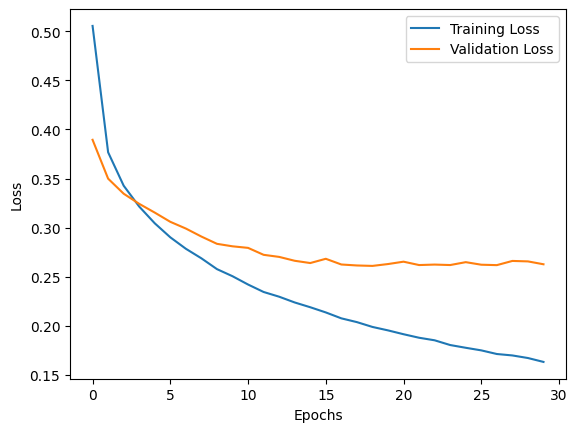

In [22]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()